# Viz

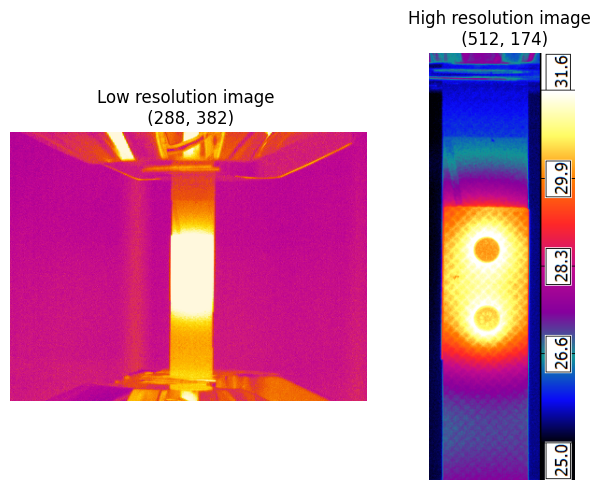

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


img1 = mpimg.imread('datasets/data_original/CFRP_60_low/Record_2025-11-11_10-42-17.tiff')
img2 = mpimg.imread('datasets/data_original/CFRP_60_high/prst_A_stat_03_5_230149.png')



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 5))

ax1.imshow(img1)
ax1.set_title(f"Low resolution image \n {img1.shape[:2]}")
ax1.axis('off')  

ax2.imshow(img2)
ax2.set_title(f"High resolution image \n {img2.shape[:2]}")
ax2.axis('off')

plt.tight_layout()
plt.show()

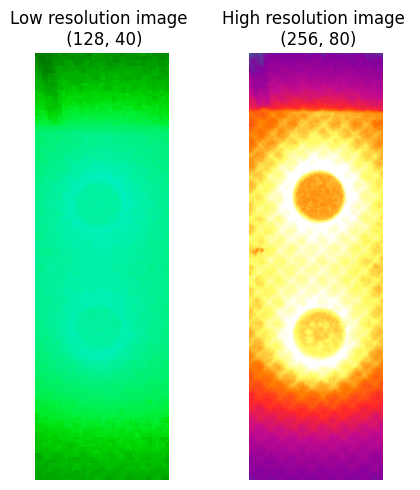

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


img1 = mpimg.imread('datasets/ifr_images/trainA/0.png')
img2 = mpimg.imread('datasets/ifr_images/trainB/0.png')

start_col = (256 - 80) // 2  # This is 88
end_col = start_col + 80     # This is 168

img1 = img1[:, start_col:end_col]
img1 = img1[::2,::2]

img2 = img2[:, start_col:end_col]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 5))

ax1.imshow(img1)
ax1.set_title(f"Low resolution image \n {img1.shape[:2]}")
ax1.axis('off')  

ax2.imshow(img2)
ax2.set_title(f"High resolution image \n {img2.shape[:2]}")
ax2.axis('off')

plt.tight_layout()
plt.show()

# Baseline model : bicubic interpolation

In [7]:
from PIL import Image, ImageDraw, ImageFilter
import matplotlib.pyplot as plt
import numpy as np
import os, shutil

dir_low_enhanced = 'datasets/ifr_images/trainA'
dir_high_enhanced = 'datasets/ifr_images/trainB'
in_size = (40, 128)
out_size = (80, 256)

In [8]:
def bicubic_upscale(image_num, plot=False):
    path = f"{dir_low_enhanced}/{str(image_num)}.png"
    
    # Check if file exists
    if not os.path.exists(path): 
        print(f"File not found: {path}")
        return None

    img = Image.open(path)
    start_col = (img.width - 80) // 2
    end_col = start_col + 80
    img = img.crop((start_col, 0, end_col, img.height))
    img = img.resize((img.width // 2, img.height // 2), Image.Resampling.NEAREST)
    # Handle transparency or palette modes by converting to RGB
    img = img.convert('RGB') if img.mode in ['P', 'RGBA'] else img

    # Upscale & Sharpen (Bicubic Resampling)
    # Note: Ensure 'out_size' is defined in your global scope or passed as an argument
    up = img.resize(out_size, resample=Image.Resampling.BICUBIC)

    if plot:
        plt.figure(figsize=(12, 6)) # Set global figure size

        # Subplot 1: Before
        plt.subplot(1, 2, 1) # 1 row, 2 columns, index 1
        plt.imshow(img, cmap='gray')
        plt.title(f"Before (Original)\nSize: {img.size}")
        plt.axis('off') # Hide X/Y axes

        # Subplot 2: After
        plt.subplot(1, 2, 2) # 1 row, 2 columns, index 2
        plt.imshow(up, cmap='gray')
        plt.title(f"After (Bicubic)\nSize: {up.size}")
        plt.axis('off')

        plt.tight_layout() # Prevent title overlap
        plt.show()

    return up

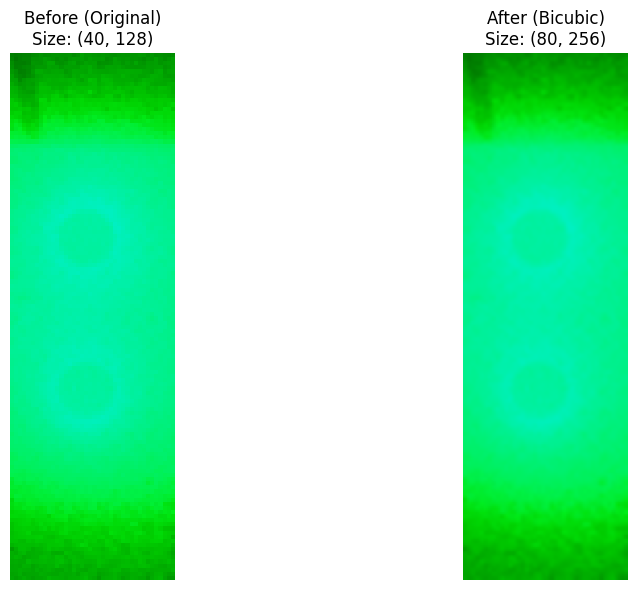

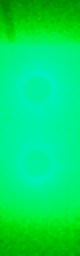

In [9]:
bicubic_upscale(0, plot=True)

In [47]:
from PIL import Image
def bicubic_upscale_filter(image_num, plot=False,additionnal_image=False):
    path = f"{dir_low_enhanced}/{str(image_num)}.png"
    
    if not os.path.exists(path): 
        return None

    img = Image.open(path)
    if img.mode in ['P', 'RGBA']:
        img = img.convert('RGB')
    start_col = (img.width - 80) // 2
    end_col = start_col + 80
    img = img.crop((start_col, 0, end_col, img.height))
    img = img.resize((img.width // 2, img.height // 2), Image.Resampling.NEAREST)
    up = img.resize(out_size, resample=Image.Resampling.BICUBIC)
    
    # Application du filtre passe-haut (Sharpening)
    up_hf = up.filter(ImageFilter.UnsharpMask(radius=2, percent=3000, threshold=1))
    fontsize=17
    up = Image.blend(up, up_hf, alpha=0.6)
    if plot:
        k = 2
        if additionnal_image :
            k = 3
        plt.figure(figsize=(8, 6))

        plt.subplot(1, k, 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"LR:\n(40, 128)",fontsize=fontsize)
        plt.axis('off')

        plt.subplot(1, k, 2)
        plt.imshow(up, cmap='gray')
        plt.title(f"Upscaled & Filtered:\n(80, 256)",fontsize=fontsize)
        plt.axis('off')
        if additionnal_image :
            plt.subplot(1, k, 3)
            plt.imshow(additionnal_image[1], cmap='gray')
            plt.title(additionnal_image[0],fontsize=fontsize)
            plt.axis('off')
        plt.tight_layout()
        plt.show()

    return up

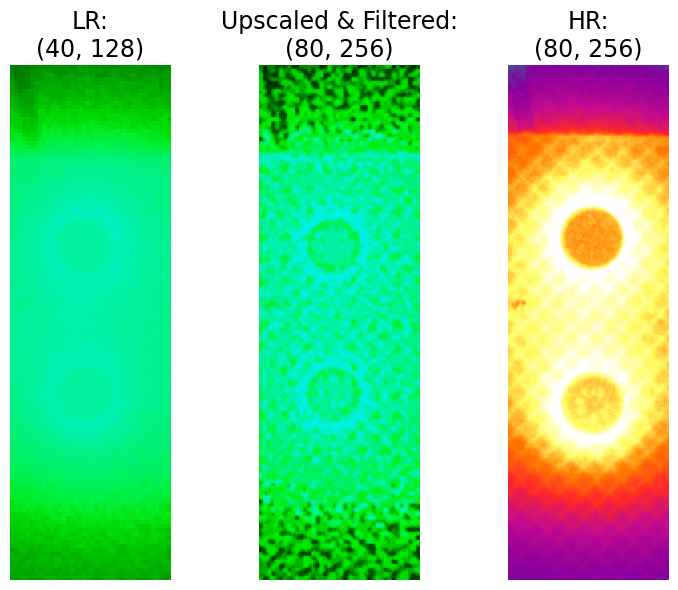

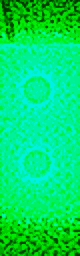

In [48]:
bicubic_upscale_filter(0, plot=True,additionnal_image=(f"HR:\n{img2.shape[:2][::-1]}",img2))